<a href="https://colab.research.google.com/github/MajdQ93/Time-Series-Forecast/blob/main/Timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNRValues  100 non-null    float64
dtypes: float64(1)
memory usage: 928.0 bytes
Results of Dickey-Fuller Test:
Test Statistic                -1.158892e+01
p-value                        2.822907e-21
#Lags Used                     0.000000e+00
Number of Observations Used    9.900000e+01
Critical Value (1%)           -3.498198e+00
Critical Value (5%)           -2.891208e+00
Critical Value (10%)          -2.582596e+00
dtype: float64


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


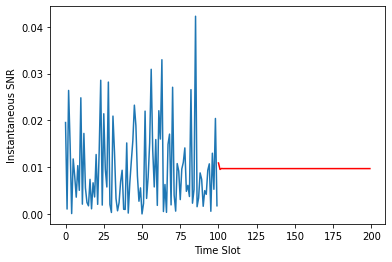

100    0.010901
101    0.009520
102    0.009729
103    0.009697
104    0.009702
         ...   
195    0.009701
196    0.009701
197    0.009701
198    0.009701
199    0.009701
Name: predicted_mean, Length: 100, dtype: float64
100    0.010901
101    0.009520
102    0.009729
103    0.009697
104    0.009702
         ...   
195    0.009701
196    0.009701
197    0.009701
198    0.009701
199    0.009701
Name: predicted_mean, Length: 100, dtype: float64


In [51]:
#!pip install pmdarima

import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense

def test_stationarity(timeseries):
    # Perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)





# Load your time series data into a pandas DataFrame
timeseries = pd.read_csv("/content/SNRHistory=-20.csv")
timeseries = timeseries.reset_index(drop=True)
timeseries.info()

# Perform the test
test_stationarity(timeseries)


# Fit an ARIMA model
model = ARIMA(timeseries, order=(1,1,1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=100)

plt.plot(timeseries)
plt.plot(forecast, color='r')
plt.ylabel('Instantaneous SNR')
plt.xlabel('Time Slot')
plt.show()
print (forecast)


prediction = model_fit.get_prediction(start=len(timeseries), end=len(timeseries)+100-1, dynamic=False)
forecasted_values = prediction.predicted_mean
print (forecasted_values)


